## Introduction

Now that we have more data from *Afterpay*on the actual rate of purchases that attract late fees (±10%), I wanted to go back and compute the average late fees. This post is effectively an adaption of the work I did in [this](https://cgcooke.github.io/Blog/bayesian/pymc3/finance/monte%20carlo%20simulation/afterpay/2020/08/21/Afterpay-Customer-Defaults-Part-1.html) post.

:::{.callout-important}

Obviously, I need a disclaimer. If you use anything I say as the basis for any decision, financial or otherwise, you are an idiot.

:::

## Average Late Fees

In [1]:
%matplotlib inline
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import scipy.stats as st

plt.rcParams["figure.figsize"] = (10,10)
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
with pm.Model() as average_late_fee_model:
    underlying_sales_aud = pm.Uniform('underlying_sales_aud', lower=5.24715*10**9, upper=5.247249*10**9)
    
    late_fees_rev_aud = pm.Uniform('late_fees_rev', lower=46.05 * 10**6, upper=46.149 * 10**6)
    
    average_transaction_value_aud = pm.Uniform('average_transaction_value', lower=144.50, upper=154.49)
    
    late_payment_rate = pm.Uniform('late_payment_rate',lower=9.5,upper=10.5)/100.0
    
    number_of_transactions = pm.Deterministic('number_of_transactions', underlying_sales_aud / average_transaction_value_aud)
    
    late_transactions = pm.Deterministic('late_transactions', late_payment_rate * number_of_transactions)
                                         
    average_late_fee_aud = pm.Deterministic('average_late_fee_aud', late_fees_rev_aud / late_transactions)
    
pm.model_to_graphviz(model)

with average_late_fee_model:
    samples = pm.sample_prior_predictive(samples = 100_000)      


## Results

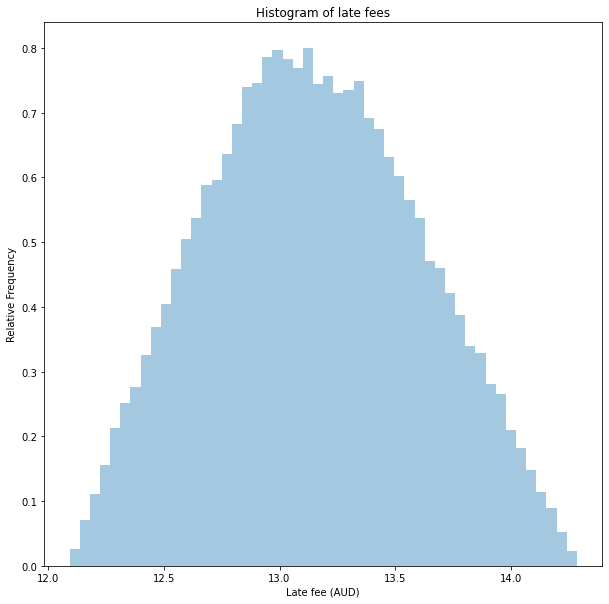

In [2]:
late_fee_samples = samples['average_late_fee_aud']
plt.title('Histogram of late fees')
plt.ylabel('Relative Frequency')
plt.xlabel('Late fee (AUD)')
sns.distplot(late_fee_samples,kde=False, norm_hist=True)
plt.show()

In [3]:
pm.summary(samples["average_late_fee_aud"])

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 100000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
x,13.146,0.458,12.313,13.982,0.001,0.001,99393.0,99393.0,99248.0,99302.0,NaN


## Conclusion

The late fees that *Afterpay* customers pay are low, somewhere between 12 AUD and 14 AUD on average. This fits what we observed in previous [posts](https://cgcooke.github.io/Blog/bayesian/pymc3/finance/monte%20carlo%20simulation/afterpay/2020/08/27/Afterpay-Customer-Defaults-Part-4.html#Conclusion), where customers were typically late on only one of the four payments. 